In [302]:
import pandas as pd
import numpy as np

pf = pd.read_json('subjectScores.json', encoding='utf-8')

pf.drop(['email'], axis=1, inplace=True) # Se elimina el email porque no es necesario
# pf = pf[pf['subject_score'] != 0] # Se eliminan los registros que no tienen calificación']]
# pf.drop(['subject_career'], axis=1, inplace=True) # Se elimina la carrera porque no es necesaria'
# pf.drop(['career'], axis=1, inplace=True)
pf.head()

,career,semester,keywords,subject,subject_career,subject_semester,subject_score
0,Tecnología en Electrónica,2,[Fundamentos],Comercio Exterior,"Administración de Empresas, Contaduría",6,0.0
1,Tecnología en Electrónica,2,[Fundamentos],Diseño Organizacional,Administración de Empresas,2,0.0
2,Tecnología en Electrónica,2,[Fundamentos],Economía de Empresa,Administración de Empresas,3,0.0
3,Tecnología en Electrónica,2,[Fundamentos],Entorno Organizacional,Administración de Empresas,4,0.0
4,Tecnología en Electrónica,2,[Fundamentos],Estrategia y Planeación,Administración de Empresas,5,0.0


In [303]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
pf[['semester', 'subject_semester']] = scaler.fit_transform(pf[['semester', 'subject_semester']]) # Se normalizan los datos
pf.head()

,career,semester,keywords,subject,subject_career,subject_semester,subject_score
0,Tecnología en Electrónica,0.111111,[Fundamentos],Comercio Exterior,"Administración de Empresas, Contaduría",0.555556,0.0
1,Tecnología en Electrónica,0.111111,[Fundamentos],Diseño Organizacional,Administración de Empresas,0.111111,0.0
2,Tecnología en Electrónica,0.111111,[Fundamentos],Economía de Empresa,Administración de Empresas,0.222222,0.0
3,Tecnología en Electrónica,0.111111,[Fundamentos],Entorno Organizacional,Administración de Empresas,0.333333,0.0
4,Tecnología en Electrónica,0.111111,[Fundamentos],Estrategia y Planeación,Administración de Empresas,0.444444,0.0


In [304]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
career_one_hot = enc.fit_transform(pf['career'].values.reshape(-1, 1)) # Se convierte la carrera en one hot
career_columns = enc.get_feature_names_out(['career'])
career_df = pd.DataFrame(career_one_hot, columns=career_columns) # Se crea un dataframe con las columnas de la carrera
pf = pd.concat([pf, career_df], axis=1) # Se agrega el dataframe de la carrera al dataframe principal
pf = pf.drop(['career'], axis=1) # Se elimina la columna de la carrera
pf.head()

d:\Trabajo de grado\backend2\Backend_tutorias_fastAPI\myenv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,semester,keywords,subject,subject_career,subject_semester,subject_score,career_Administración de empresas,career_Construcción,career_Contaduría,career_Ingeniería de Alimentos,career_Ingeniería de Sistemas,career_Nutrición y Dietética,career_Tecnología en Desarrollo de Software,career_Tecnología en Electrónica,career_Trabajo social
0,0.111111,[Fundamentos],Comercio Exterior,"Administración de Empresas, Contaduría",0.555556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.111111,[Fundamentos],Diseño Organizacional,Administración de Empresas,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.111111,[Fundamentos],Economía de Empresa,Administración de Empresas,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.111111,[Fundamentos],Entorno Organizacional,Administración de Empresas,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.111111,[Fundamentos],Estrategia y Planeación,Administración de Empresas,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [305]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
subject_career_one_hot = mlb.fit_transform(pf['subject_career'].str.split(', ')) # Se convierte la materia en one hot
subject_career_columns = mlb.classes_
subject_career_df = pd.DataFrame(subject_career_one_hot, columns=subject_career_columns) # Se crea un dataframe con las columnas de la materia
pf = pd.concat([pf, subject_career_df], axis=1) # Se agrega el dataframe de la materia al dataframe principal
pf = pf.drop(['subject_career'], axis=1) # Se elimina la columna de la materia
pf.head()

,semester,keywords,subject,subject_semester,subject_score,career_Administración de empresas,career_Construcción,career_Contaduría,career_Ingeniería de Alimentos,career_Ingeniería de Sistemas,...,Administración de Empresas,Construcción,Contaduría,Ingeniería de Alimentos,Ingeniería de Sistemas,Nutricion y Dietetica,Nutrición y Dietética,Tecnología en Desarrollo de Software,Tecnología en Electrónica,Trabajo social
0,0.111111,[Fundamentos],Comercio Exterior,0.555556,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0
1,0.111111,[Fundamentos],Diseño Organizacional,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,0.111111,[Fundamentos],Economía de Empresa,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3,0.111111,[Fundamentos],Entorno Organizacional,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,0.111111,[Fundamentos],Estrategia y Planeación,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0


In [306]:
from spacy.lang.es.stop_words import STOP_WORDS
pf ['keywords'] = [list (filter(lambda x: isinstance(x,str) and x not in STOP_WORDS , y)) for y in pf['keywords']] # Se eliminan las palabras vacias
pf.head()

,semester,keywords,subject,subject_semester,subject_score,career_Administración de empresas,career_Construcción,career_Contaduría,career_Ingeniería de Alimentos,career_Ingeniería de Sistemas,...,Administración de Empresas,Construcción,Contaduría,Ingeniería de Alimentos,Ingeniería de Sistemas,Nutricion y Dietetica,Nutrición y Dietética,Tecnología en Desarrollo de Software,Tecnología en Electrónica,Trabajo social
0,0.111111,[Fundamentos],Comercio Exterior,0.555556,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0
1,0.111111,[Fundamentos],Diseño Organizacional,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,0.111111,[Fundamentos],Economía de Empresa,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3,0.111111,[Fundamentos],Entorno Organizacional,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,0.111111,[Fundamentos],Estrategia y Planeación,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0


In [307]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(lowercase=True)
# tfidf_key_words = vectorizer.fit_transform(pf['keywords'].apply(lambda x: ' '.join(x))) # Se convierten las palabras clave en tfidf
# pf['keywords'] = np.array(tfidf_key_words.toarray()) # Se agrega la columna de tfidf al dataframe principal
# pf.head()
from sklearn.preprocessing import StandardScaler
import spacy
nlp = spacy.load("es_core_news_lg")
# keywords_concat = [' '.join(x) for x in pf['keywords']]
# vectores = [nlp(x).vector_norm for x in keywords_concat]
vectores = [nlp(' '.join(x)).vector_norm for x in pf['keywords']]
vectores = np.array(vectores)
scaler = StandardScaler()
vectores = scaler.fit_transform(vectores.reshape(-1, 1))
pf['keywords'] = vectores
pf.head()

,semester,keywords,subject,subject_semester,subject_score,career_Administración de empresas,career_Construcción,career_Contaduría,career_Ingeniería de Alimentos,career_Ingeniería de Sistemas,...,Administración de Empresas,Construcción,Contaduría,Ingeniería de Alimentos,Ingeniería de Sistemas,Nutricion y Dietetica,Nutrición y Dietética,Tecnología en Desarrollo de Software,Tecnología en Electrónica,Trabajo social
0,0.111111,0.256411,Comercio Exterior,0.555556,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0
1,0.111111,0.256411,Diseño Organizacional,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,0.111111,0.256411,Economía de Empresa,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3,0.111111,0.256411,Entorno Organizacional,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,0.111111,0.256411,Estrategia y Planeación,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0


In [308]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_subject = label_encoder.fit_transform(pf['subject']) # Se convierte la materia en un label
pf = pf.drop(['subject'], axis=1) # Se elimina la columna de la materia
pf['subject'] = label_subject # Se agrega la columna de label al dataframe principal
pf.head()

,semester,keywords,subject_semester,subject_score,career_Administración de empresas,career_Construcción,career_Contaduría,career_Ingeniería de Alimentos,career_Ingeniería de Sistemas,career_Nutrición y Dietética,...,Construcción,Contaduría,Ingeniería de Alimentos,Ingeniería de Sistemas,Nutricion y Dietetica,Nutrición y Dietética,Tecnología en Desarrollo de Software,Tecnología en Electrónica,Trabajo social,subject
0,0.111111,0.256411,0.555556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,13
1,0.111111,0.256411,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,24
2,0.111111,0.256411,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,25
3,0.111111,0.256411,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,29
4,0.111111,0.256411,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,32


In [309]:
from sklearn.model_selection import train_test_split
x = pf.drop(['subject_score'], axis=1) # Se separa la columna de la materia
y = pf['subject_score'] # Se separa la columna de la nota
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2,shuffle=True) # Se separan los datos en train y test
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4931, 23) (4931,) (1233, 23) (1233,)


In [310]:
from keras.models import Sequential
from keras.layers import Dense

n_features = X_train.shape[1] # Se obtiene la cantidad de features
model = Sequential() # Se crea el modelo
model.add(Dense(200, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,))) # Se agrega la capa de entrada
model.add(Dense(400, activation='relu', kernel_initializer='he_normal')) # Se agrega la capa oculta
model.add(Dense(1)) # Se agrega la capa de salida
model.compile(optimizer='adam', loss='mse') # Se compila el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2) # Se entrena el modelo

Epoch 1/100
155/155 - 1s - loss: 4.4722 - 1s/epoch - 9ms/step
Epoch 2/100
155/155 - 0s - loss: 0.0782 - 427ms/epoch - 3ms/step
Epoch 3/100
155/155 - 0s - loss: 0.0660 - 498ms/epoch - 3ms/step
Epoch 4/100
155/155 - 0s - loss: 0.0607 - 477ms/epoch - 3ms/step
Epoch 5/100
155/155 - 0s - loss: 0.1172 - 379ms/epoch - 2ms/step
Epoch 6/100
155/155 - 0s - loss: 0.0808 - 363ms/epoch - 2ms/step
Epoch 7/100
155/155 - 0s - loss: 0.2135 - 364ms/epoch - 2ms/step
Epoch 8/100
155/155 - 0s - loss: 1.1781 - 375ms/epoch - 2ms/step
Epoch 9/100
155/155 - 1s - loss: 0.2491 - 518ms/epoch - 3ms/step
Epoch 10/100
155/155 - 0s - loss: 0.0555 - 394ms/epoch - 3ms/step
Epoch 11/100
155/155 - 0s - loss: 0.0541 - 375ms/epoch - 2ms/step
Epoch 12/100
155/155 - 0s - loss: 0.6430 - 404ms/epoch - 3ms/step
Epoch 13/100
155/155 - 0s - loss: 0.1742 - 384ms/epoch - 2ms/step
Epoch 14/100
155/155 - 0s - loss: 0.0638 - 406ms/epoch - 3ms/step
Epoch 15/100
155/155 - 0s - loss: 0.0739 - 414ms/epoch - 3ms/step
Epoch 16/100
155/155 -

In [311]:
y_pred = model.predict(X_test) # Se obtienen las predicciones
y_pred

39/39 [==============================] - 0s 2ms/step


array([[0.05527479],
       [0.07217104],
       [0.7217966 ],
       ...,
       [0.01490337],
       [0.03162042],
       [0.0570801 ]], dtype=float32)

In [312]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

MSE:  0.0028806672740866236
MAE:  0.040185753158916815
R2:  0.9311632527266595


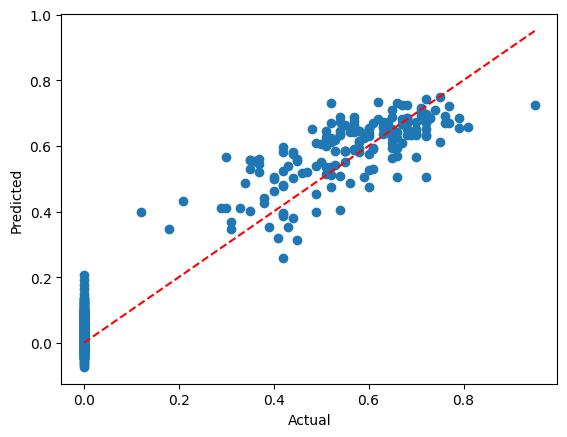

In [321]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')

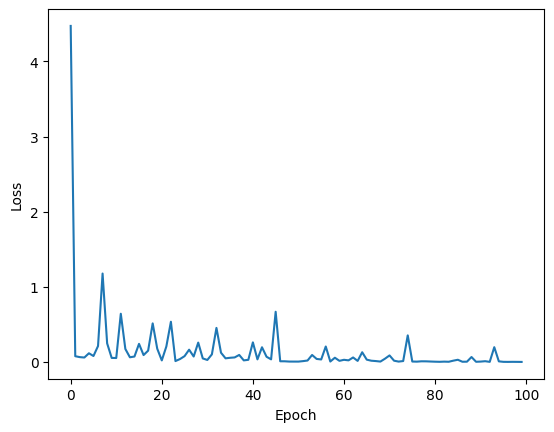

In [314]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [322]:
model.save('subjectScoresPrueba.h5') # Se guarda el modelo

d:\Trabajo de grado\backend2\Backend_tutorias_fastAPI\myenv\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
